# KMeans++

## Que supone?

Supone centros (centroides) alrededor de los cuales los datos se agrupan uniformemente (esfericamente si son puntos en 3D, radialmente si son datos en 2D y linealmente si son datos unidimensionales, etc)

## Ejemplo Básico

In [1]:
from sklearn.datasets import make_blobs
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

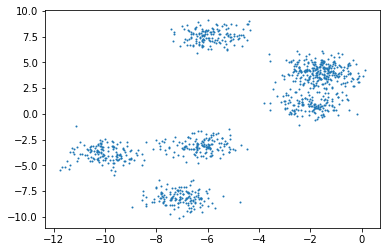

In [2]:
X, y = make_blobs(n_samples=1000, centers=7, cluster_std=0.7, random_state=1)
fig, ax = plt.subplots(figsize=(6,4), nrows=1)
ax.scatter(X[:,0], X[:,1], s=1)
plt.show()

In [3]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

n = 6
modelo = KMeans(n_clusters = n).fit(X)

y_means = modelo.fit_predict(X)
centroides = modelo.cluster_centers_

In [4]:
X

array([[-8.9537354 , -9.00256479],
       [-5.7533224 ,  7.93731814],
       [-1.52247635, -0.08968061],
       ...,
       [-6.06226361,  8.1459239 ],
       [-9.43152145, -2.70052027],
       [-6.35604769,  7.73838014]])

In [5]:
y_means[:50]

array([2, 3, 4, 3, 4, 5, 0, 5, 3, 5, 0, 1, 0, 4, 1, 1, 0, 2, 1, 3, 4, 0,
       0, 2, 2, 4, 3, 3, 4, 4, 3, 1, 1, 2, 4, 3, 4, 3, 0, 5, 3, 5, 0, 1,
       0, 4, 5, 1, 0, 0])

In [6]:
centroides

array([[ -1.59613935,   4.1227784 ],
       [-10.01620831,  -3.86636082],
       [ -7.06131015,  -8.15428389],
       [ -5.88497534,   7.56802433],
       [ -1.97464844,   0.94638895],
       [ -6.26529991,  -3.087848  ]])

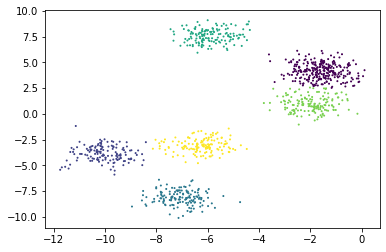

In [7]:
fig, ax = plt.subplots(figsize=(6,4), nrows=1)
ax.scatter(X[:,0], X[:,1], s=1, c=y_means)

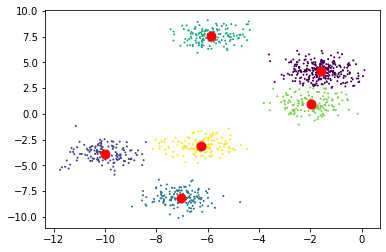

In [8]:
fig, ax = plt.subplots(figsize=(6,4), nrows=1)
ax.scatter(X[:,0], X[:,1], s=1, c=y_means)
ax.scatter(centroides[:,0], centroides[:,1], s=80, color='r')

## Buscando el "k" óptimo

* Método del codo (elbow curves)
* Gradiiente del codo
* Método de silueta (silhouette plots)
* Fomrulas propias tipo taylor-made
* Indice de Dunn  (ratio menor distancia extra-cluster y la mayor intra-cluster)
* Indice de Davies-Bouldin (ratio de dist intra/extra cluster, a menor ratio mejor)
* Indice Calinski-Harabasz (ratio de varianzas extra/intra cluster, a mayor, mejor)

In [9]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

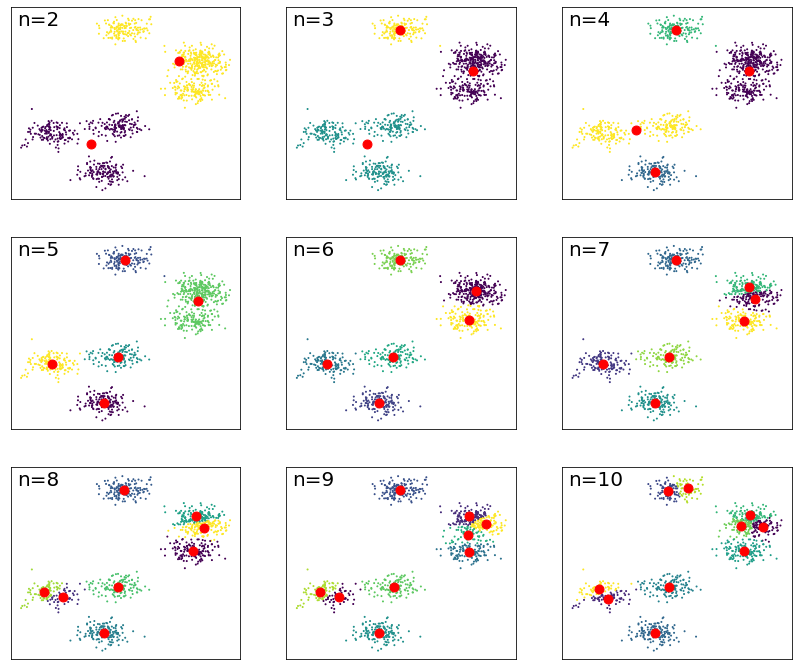

CPU times: total: 23.4 s
Wall time: 4.94 s


In [10]:
%%time

filas = 3
columnas = 3
fig, ax = plt.subplots(figsize=(14,12), nrows=filas, ncols=columnas)
idb, ich = [], []

for i in range (filas*columnas):
    col = i % columnas
    row = i // columnas
    modelo = KMeans(n_clusters = i+2)
    y_means = modelo.fit_predict(X)
    centroides = modelo.cluster_centers_
    ax[row][col].scatter(X[:,0], X[:,1], s=1, c=y_means)
    ax[row][col].scatter(centroides[:,0], centroides[:,1], s=80, color='r')
    ax[row][col].axes.xaxis.set_visible(False)
    ax[row][col].axes.yaxis.set_visible(False)
    ax[row][col].text(s = 'n='+str(i+2), fontsize=20, y=8, x=-12)

    ich.append(calinski_harabasz_score(X,y_means))
    idb.append(davies_bouldin_score(X,y_means))

plt.show()

## Método del Codo

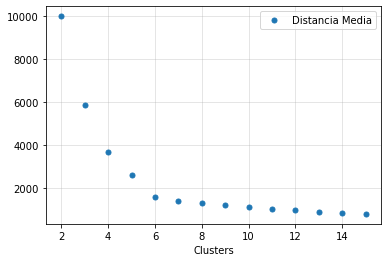

In [11]:
X, y = make_blobs(n_samples=1000, centers=7, cluster_std=0.9, random_state=1)
fig, ax = plt.subplots(figsize=(6,4), nrows=1)

pruebas = 15
modelos = [KMeans(n_clusters = n).fit(X)  for n in range(2,pruebas+1)]

distancia_media = [m.inertia_ for m in modelos]
labels = [m.labels_ for m in modelos]
ax.plot(range(2,pruebas+1), distancia_media, lw=0, marker='o', markersize=5, label='Distancia Media')
ax.legend()
ax.set_xlabel('Clusters')
ax.grid(alpha=0.4)
plt.show()

In [12]:
distancia_media

[9982.407285257606,
 5877.312577857641,
 3666.495369664776,
 2594.7845801458993,
 1566.5928880024437,
 1400.0482510754337,
 1297.7673548931575,
 1201.8942195165962,
 1127.6370945661972,
 1045.7763134219535,
 990.1325269628363,
 906.9442178334828,
 848.3447223918936,
 803.1137563926552]

<AxesSubplot:>

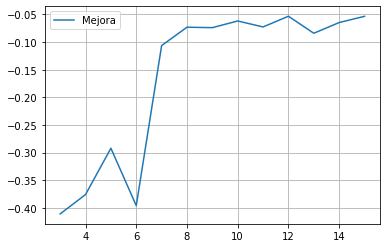

In [14]:
import pandas as pd

pruebas = 15
pd.DataFrame(distancia_media, index=range(2,pruebas+1), columns=['Mejora']).pct_change().plot(grid=True)

## Método de la silueta

$$ \Large s(i)={\frac {b(i)-a(i)}{\max\{a(i),b(i)\}}} \hspace{10mm} \small \begin{cases}
  1-a(i)/b(i), & \mbox{if } a(i) < b(i) \\
  0,  & \mbox{if } a(i) = b(i) \\
  b(i)/a(i)-1, & \mbox{if } a(i) > b(i) \\
\end{cases}
$$

para cada punto:
   * a: distancia media intercluster
   * b: distancia mas cercana al cluster vecino

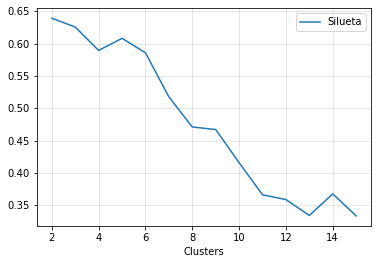

In [15]:
from sklearn.metrics import silhouette_score

fig, ax = plt.subplots(figsize=(6,4), nrows=1)

pruebas = 15
modelos = [KMeans(n_clusters = n).fit(X)  for n in range(2,pruebas+1)]

siluetas = [silhouette_score(X, m.labels_) for m in modelos]
labels = [m.labels_ for m in modelos]
ax.plot(range(2,pruebas+1), siluetas, label='Silueta')
ax.legend()
ax.set_xlabel('Clusters')
ax.grid(alpha=0.4)
plt.show()

## Fórmula taylor made

Vamos a poner:
   * Silueta en el numerador (a mayor valor mejor)
   * Distancia media en el denominador (a menor distancia mejor)
   * Numero de clusteres en el denominador (penalizando el sobreajuste)

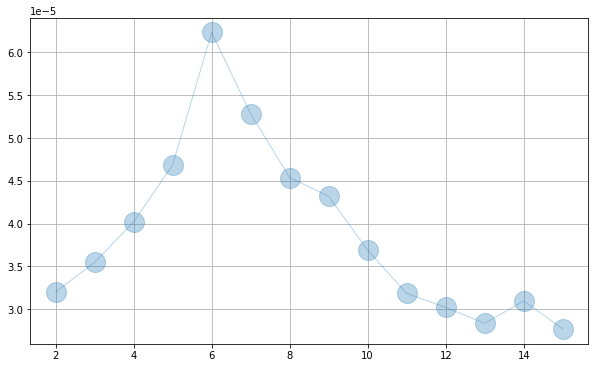

In [16]:
import numpy as np
import pandas as pd

pruebas = 15
res = pd.DataFrame(np.array(siluetas) / (np.array(distancia_media) * np.arange(2,pruebas+1)), index=range(2,pruebas+1))
fig, ax = plt.subplots(figsize=(10,6), nrows=1)

ax.grid()
ax.plot(res, marker='o', markersize=20, alpha=0.3, lw=1)

## Indices de Davies-Bouldin y Calinski-Harabasz

* Indice de Dunn  (ratio menor distancia extra-cluster y la mayor intra-cluster)
* Indice de Davies-Bouldin (ratio de dist intra/extra cluster, a menor ratio mejor)
* Indice Calinski-Harabasz (ratio de varianzas extra/intra cluster, a mayor, mejor)

In [17]:
idb

[0.5347013439178403,
 0.4363831797158532,
 0.5086167091257487,
 0.4163228990384824,
 0.45321369420141,
 0.6261372631751524,
 0.7697744413567971,
 0.787532772137771,
 0.8880787633214153]

<AxesSubplot:title={'center':'Indice de Davies Bouldin - A menos mejor'}>

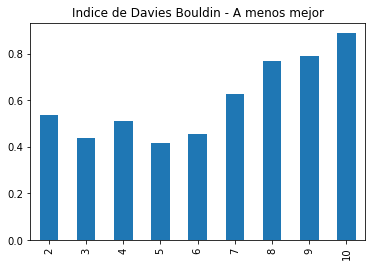

In [18]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
import pandas as pd

idb = pd.Series(idb, index=list(range(2,11)))
idb.plot(kind='bar', title='Indice de Davies Bouldin - A menos mejor')

<AxesSubplot:title={'center':'Indice de Calinski Harabasz - A Mayor mejor'}>

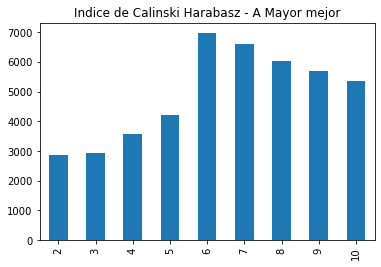

In [19]:
ich = pd.Series(ich, index=list(range(2,11)))
ich.plot(kind='bar', title='Indice de Calinski Harabasz - A Mayor mejor')

<AxesSubplot:>

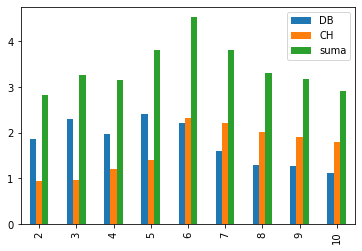

In [20]:
indices = pd.concat([1/idb,ich/3000], axis=1, keys=['DB','CH'])
indices['suma'] = indices.DB + indices.CH
indices.plot(kind='bar')

## ¿Donde falla K-means?

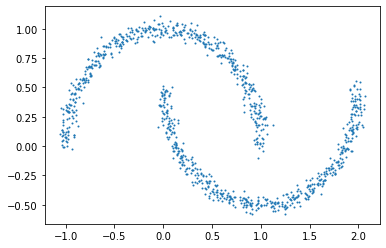

In [22]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(1000, noise=0.04, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1], s=1)

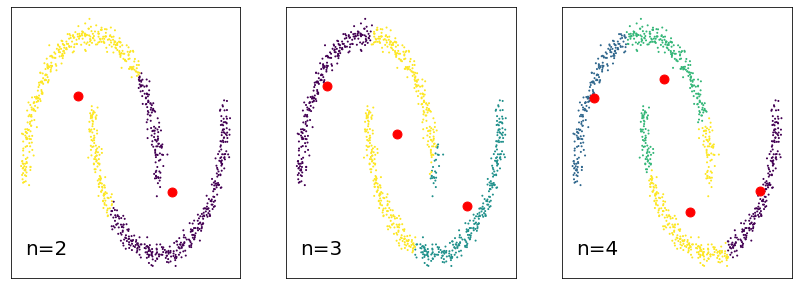

In [23]:
columnas = 3
fig, ax = plt.subplots(figsize=(14,5), ncols=columnas)

X = Xmoon
for i in range (columnas):
    modelo = KMeans(n_clusters = i+2)
    y_means = modelo.fit_predict(X)
    centroides = modelo.cluster_centers_
    ax[i].scatter(X[:,0], X[:,1], s=1, c=y_means)
    ax[i].scatter(centroides[:,0], centroides[:,1], s=80, color='r')
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)
    ax[i].text(s = 'n='+str(i+2), fontsize=20, y=-.5, x=-1)


plt.show()

## Donde mas?

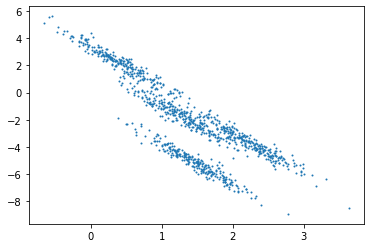

In [24]:
import numpy as np
X, y = make_blobs(random_state=1, n_samples=1000, centers = 4)

# Transformo las manchas de puntos en estrechas
rng = np.random.RandomState(6)
transformation = rng.normal(size=(2, 2))
X_estrechos = np.dot(X, transformation)

plt.scatter(X_estrechos[:, 0], X_estrechos[:, 1], s=1)

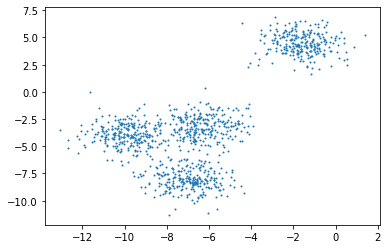

In [25]:
plt.scatter(X[:, 0], X[:, 1], s=1)

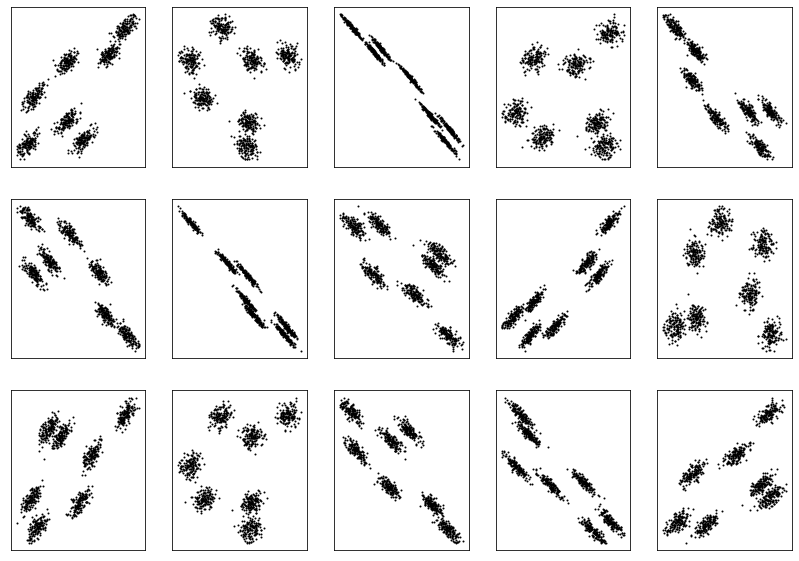

In [26]:
filas = 3
columnas = 5
fig, ax = plt.subplots(figsize=(14,10), nrows=filas, ncols=columnas)

X, y = make_blobs(random_state=10, n_samples=1000, centers = 7)

for i in range (filas*columnas):
    rng = np.random.RandomState(i)
    transformation = rng.normal(size=(2, 2))
    X_stretched = np.dot(X, transformation)
    col = i % columnas
    row = i // columnas
    ax[row][col].scatter(X_stretched[:,0], X_stretched[:,1], s=1, c='k')
    ax[row][col].axes.xaxis.set_visible(False)
    ax[row][col].axes.yaxis.set_visible(False)

plt.show()

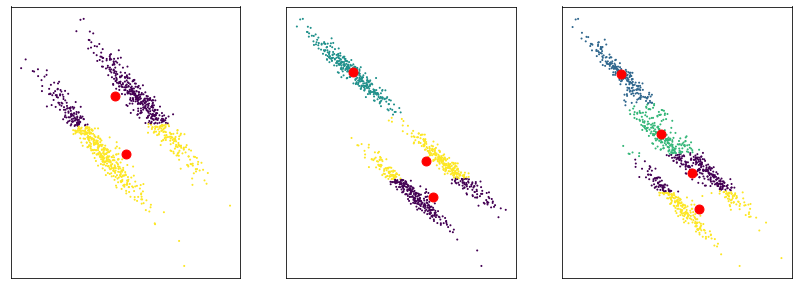

In [27]:
columnas = 3
fig, ax = plt.subplots(figsize=(14,5), ncols=columnas)

for i in range (columnas):

    X, y = make_blobs(random_state=1, n_samples=1000, centers = i+2)
    rng = np.random.RandomState(6)
    transformation = rng.normal(size=(2, 2))
    X_estrechos = np.dot(X, transformation)

    modelo = KMeans(n_clusters = i+2).fit(X_estrechos)
    y_means = modelo.predict(X_estrechos)
    centroides = modelo.cluster_centers_
    ax[i].scatter(X_estrechos[:,0], X_estrechos[:,1], s=1, c=y_means)
    ax[i].scatter(centroides[:,0], centroides[:,1], s=80, color='r')
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

plt.show()

# Mezcla Gaussiana

## ¿Qué supone?

* Los puntos no se distribuyen uniformemente en las dimensiones que tenga el set de datos


* Se distribuyen según la distr normal


* Los clusteres pueden tomar formas elípticas siguiendo distr normal para dimension X e Y (dist focales)


* IMPORTANTE: La mayoria de los puntos estan aglomerados en el centro del cluster, pero permite outliers como en una distr normal


* Cada cluster puede tener una matriz de covarianzas independiente (covariance_type=Full) o bien compartir todos la misma matriz (covariance_type=tied) incluso puede generalizarse a un kmeans usando covariance_type=spherical tratando a cada cluster con una varianza unica}


## Ejemplo básico

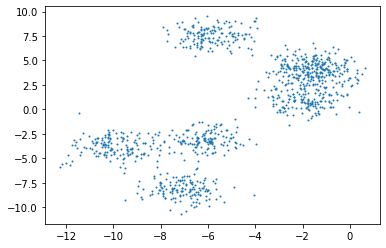

In [28]:
X, y = make_blobs(n_samples=1000, centers=7, cluster_std=0.9, random_state=1)
fig, ax = plt.subplots(figsize=(6,4), nrows=1)
ax.scatter(X[:,0], X[:,1], s=1)
plt.show()

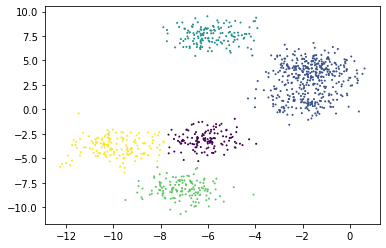

In [29]:
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

modelo = GaussianMixture(n_components=5, covariance_type='full').fit(X)
y_means = modelo.predict(X)

fig, ax = plt.subplots(figsize=(6,4), nrows=1)
ax.scatter(X[:,0], X[:,1], s=1, c=y_means)

## Método silueta para encontrar número óptimo

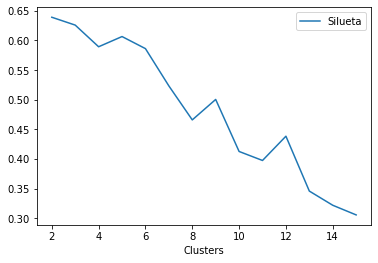

In [30]:
from sklearn.metrics import silhouette_score

fig, ax = plt.subplots(figsize=(6,4), nrows=1)

pruebas = 15
modelos = [GaussianMixture(n_components=n, covariance_type='full').fit(X)  for n in range(2,pruebas+1)]

labels = [m.predict(X) for m in modelos]
siluetas = [silhouette_score(X, m.predict(X)) for m in modelos]
ax.plot(range(2,pruebas+1), siluetas, label='Silueta')
ax.legend()
ax.set_xlabel('Clusters')
plt.show()

## Criterio de información Bayesiana y Akaike

Principal ventaja de ambos: Penaliza la mayor cantidad de clusteres (sobretodo el BIC) y me evita sobreajustar

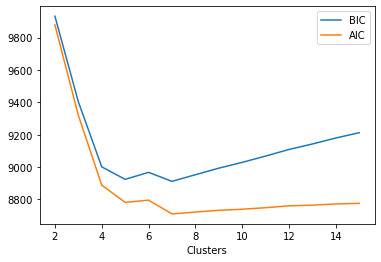

In [31]:
fig, ax = plt.subplots(figsize=(6,4))

pruebas = np.arange(2, 16)
modelos = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in pruebas]
ax.plot(pruebas, [m.bic(X) for m in modelos], label='BIC')
ax.plot(pruebas, [m.aic(X) for m in modelos], label='AIC')
ax.legend(loc='best')
ax.set_xlabel('Clusters')
plt.show()

## ¿y como camina esto con las nubes estrechas?

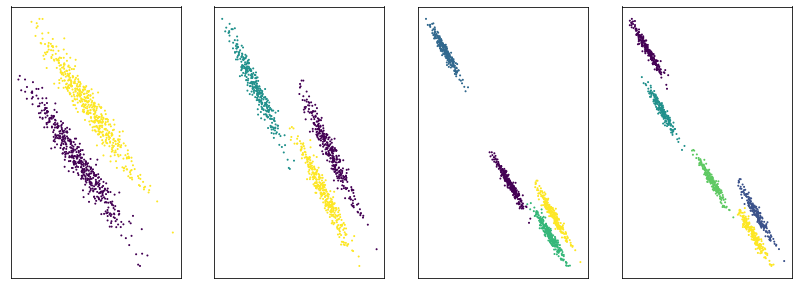

In [32]:
columnas = 4
fig, ax = plt.subplots(figsize=(14,5), ncols=columnas)

for i in range (columnas):

    X, y = make_blobs(random_state=170, n_samples=1000, centers = i+2)
    rng = np.random.RandomState(6)
    transformation = rng.normal(size=(2, 2))
    X_estrechos = np.dot(X, transformation)

    modelo = GaussianMixture(n_components=i+2, covariance_type='full').fit(X_estrechos)
    y_means = modelo.fit_predict(X_estrechos)
    ax[i].scatter(X_estrechos[:,0], X_estrechos[:,1], s=1, c=y_means)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

plt.show()

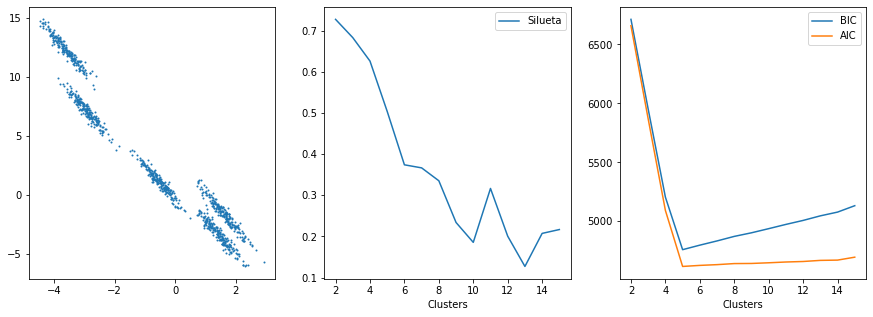

In [33]:
X, y = make_blobs(random_state=170, n_samples=1000, centers = 5)
rng = np.random.RandomState(6)
transformation = rng.normal(size=(2, 2))
X_estrechos = np.dot(X, transformation)

fig, ax = plt.subplots(figsize=(15,5), ncols=3)
ax[0].scatter(X_estrechos[:, 0], X_estrechos[:, 1], s=1)

pruebas = np.arange(2, 16)
modelos = [GaussianMixture(n_components=n, covariance_type='full').fit(X_estrechos)  for n in pruebas]

labels = [m.predict(X_estrechos) for m in modelos]
siluetas = [silhouette_score(X_estrechos, m.predict(X_estrechos)) for m in modelos]
ax[1].plot(pruebas, siluetas, label='Silueta')
ax[1].legend()
ax[1].set_xlabel('Clusters')


ax[2].plot(pruebas, [m.bic(X_estrechos) for m in modelos], label='BIC')
ax[2].plot(pruebas, [m.aic(X_estrechos) for m in modelos], label='AIC')
ax[2].legend(loc='best')
ax[2].set_xlabel('Clusters')


plt.show()

## ¿Y con las medialunas?

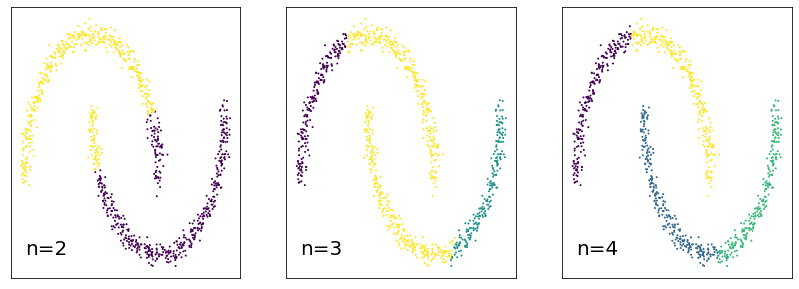

In [34]:
columnas = 3
fig, ax = plt.subplots(figsize=(14,5), ncols=columnas)

for i in range (columnas):
    modelo = GaussianMixture(n_components=i+2, covariance_type='full').fit(X)
    y_means = modelo.fit_predict(Xmoon)
    ax[i].scatter(Xmoon[:,0], Xmoon[:,1], s=1, c=y_means)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)
    ax[i].text(s = 'n='+str(i+2), fontsize=20, y=-.5, x=-1)

plt.show()

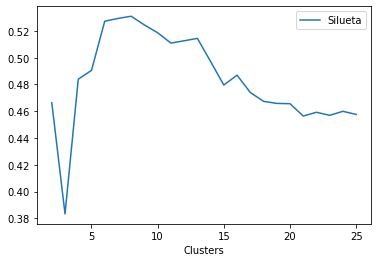

In [35]:
fig, ax = plt.subplots(figsize=(6,4), nrows=1)

pruebas = 25
modelos = [GaussianMixture(n_components=n, covariance_type='full').fit(Xmoon)  for n in range(2,pruebas+1)]

labels = [m.predict(Xmoon) for m in modelos]
siluetas = [silhouette_score(Xmoon, m.predict(Xmoon)) for m in modelos]
ax.plot(range(2,pruebas+1), siluetas, label='Silueta')
ax.legend()
ax.set_xlabel('Clusters')
plt.show()

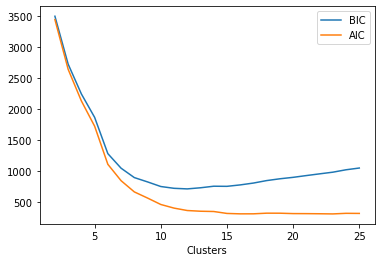

In [36]:
fig, ax = plt.subplots(figsize=(6,4))

pruebas = np.arange(2, 26)
modelos = [GaussianMixture(n, covariance_type='full', random_state=0).fit(Xmoon) for n in pruebas]
ax.plot(pruebas, [m.bic(Xmoon) for m in modelos], label='BIC')
ax.plot(pruebas, [m.aic(Xmoon) for m in modelos], label='AIC')
ax.legend(loc='best')
ax.set_xlabel('Clusters')
plt.show()

## ¿Y a donde nos metemos las medialunas entonces?

tranca, todavia no

# DBSCAN

## ¿Que hace?

* Empieza seleccionando arbitrariamente un punto (hasta visitar todos)


* Si hay al menos una cantidad de "minPoints" (min_samples) dentro de un radio de "ε" (EPS) hasta el punto, entonces consideramos que todos estos puntos forman parte del mismo grupo.


* Los grupos se expanden sucesivamente hasta barrer a todos

<img src='https://miro.medium.com/v2/resize:fit:640/1*WBRWZwSeIw-V4Hw9-_0xrQ.gif'>

## Ventajas y Desventajas

### Ventajas

* No requiere un número K de clusteres como input, lo determina solo (pero requiere una parametrizacion de distancia mínima)


* Permite clasificar o etiquetar como "ruido" a los puntos visitados que no entran en la distancia minima de ningun cluster


### Desventajas

* Cuando hay clusteres de densidad variable anda muy mal, porque el epsilon es un parámetro único:
    * Si es grande genera muchos clusters en las zonas menos densas
    * Si es chico deja las zonas menos densas como "ruido"

## Ejemplo básico, solución ideal para las medialunas

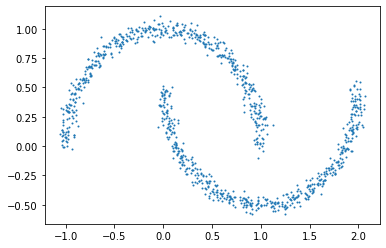

In [38]:
from sklearn.cluster import DBSCAN

Xmoon, ymoon = make_moons(1000, noise=0.04, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1], s=1)

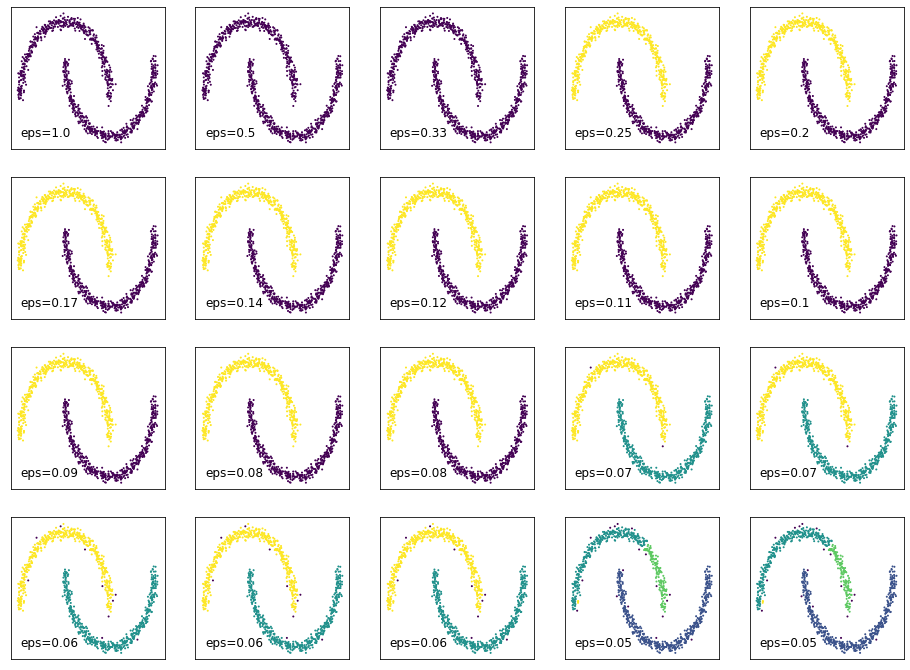

In [39]:
filas = 4
columnas = 5
fig, ax = plt.subplots(figsize=(16,12), nrows=filas, ncols=columnas)

for i in range (filas*columnas):
    col = i % columnas
    row = i // columnas

    tolerancia = round(1/(i+1),2)  # Funcion de decrecimiento, hiperbolica
    modelo = DBSCAN(eps = tolerancia, min_samples=2).fit(Xmoon)
    y_means = modelo.fit_predict(Xmoon)
    ax[row][col].scatter(Xmoon[:,0], Xmoon[:,1], s=1, c=y_means)
    ax[row][col].axes.xaxis.set_visible(False)
    ax[row][col].axes.yaxis.set_visible(False)
    ax[row][col].text(s = 'eps='+str(tolerancia), fontsize=12, y=-0.5, x=-1)


plt.show()

In [40]:
from sklearn.cluster import estimate_bandwidth

bw = estimate_bandwidth(Xmoon, quantile=0.1)
bw

0.34574458455442153

## ¿Como mediría la optimización de este bicho?

Con epsilon=1.0 hay un solo cluster
Con epsilon=0.5 hay un solo cluster
Con epsilon=0.33 hay un solo cluster


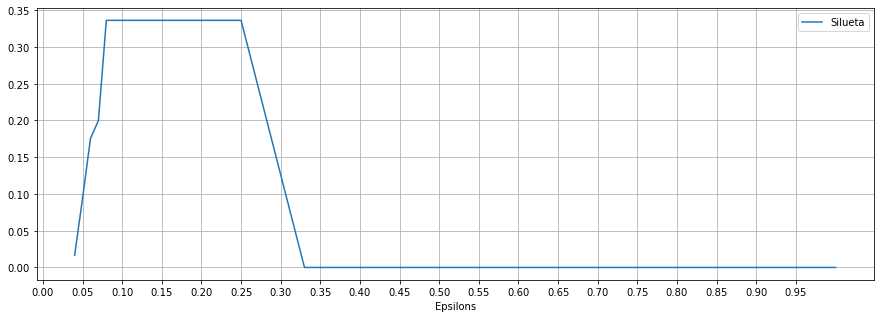

In [41]:
fig, ax = plt.subplots(figsize=(15,5), nrows=1)

pruebas = 25
siluetas = []
epsilons = []
for n in range(pruebas):
    epsilon = round(1/(n+1),2)
    epsilons.append(epsilon)
    try:
        m = DBSCAN(eps = epsilon, min_samples=2).fit(Xmoon)
        siluetas.append(silhouette_score(Xmoon, m.labels_))
    except:
        print(f'Con epsilon={epsilon} hay un solo cluster')
        siluetas.append(0)


ax.plot(epsilons, siluetas, label='Silueta')
ax.legend()
ax.set_xlabel('Epsilons')

ax.set_xticks(np.arange(0, 1, 0.05))
plt.grid()
plt.show()

In [42]:
siluetas

[0,
 0,
 0,
 0.3362849340508626,
 0.3362849340508626,
 0.3362849340508626,
 0.3362849340508626,
 0.3362849340508626,
 0.3362849340508626,
 0.3362849340508626,
 0.3362849340508626,
 0.3362849340508626,
 0.3362849340508626,
 0.19980078955382702,
 0.19980078955382702,
 0.17558042852924227,
 0.17558042852924227,
 0.17558042852924227,
 0.09387066354362358,
 0.09387066354362358,
 0.09387066354362358,
 0.09387066354362358,
 0.016645320327049917,
 0.016645320327049917,
 0.016645320327049917]

# MeanShift

## Ventajas y desventajas

Ventajas

* No necesitas pasarle el numero de clusters, lo calcula solo
* No hay riesgo de overfiting

Desventajas

* Es muy lento
* Igual que K-means no sirve para nubes de puntos no uniformes y radiales

## Ejemplo Básico

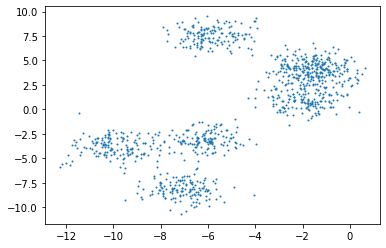

In [43]:
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=1000, centers=7, cluster_std=0.9, random_state=1)
fig, ax = plt.subplots(figsize=(6,4), nrows=1)
ax.scatter(X[:,0], X[:,1], s=1)
plt.show()

In [44]:
from sklearn.cluster import estimate_bandwidth

bw = estimate_bandwidth(X, quantile=0.3)
bw

4.292624855822502

In [45]:
%%time
modelo = MeanShift(bandwidth=bw)
y_means = modelo.fit_predict(X)
centroides = modelo.cluster_centers_

CPU times: total: 3.77 s
Wall time: 3.48 s


In [46]:
y_means[:10], centroides

(array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1], dtype=int64),
 array([[-1.7223712 ,  3.00665111],
        [-7.83270076, -4.73010697]]))

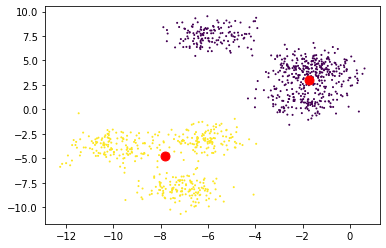

In [47]:
fig, ax = plt.subplots(figsize=(6,4), nrows=1)
ax.scatter(X[:,0], X[:,1], s=1, c=y_means)
ax.scatter(centroides[:,0], centroides[:,1], s=80, color='r')

## Dejar datos sin etiquetar

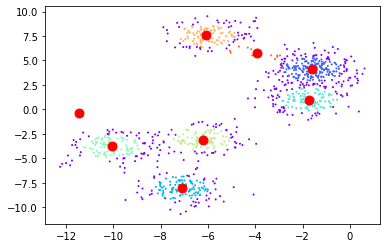

In [48]:
bw = estimate_bandwidth(X, quantile=0.06)
modelo = MeanShift(bandwidth=bw, cluster_all = False)
y_means = modelo.fit_predict(X)
centroides = modelo.cluster_centers_

fig, ax = plt.subplots(figsize=(6,4), nrows=1)
ax.scatter(X[:,0], X[:,1], s=1, c=y_means, cmap='rainbow')
ax.scatter(centroides[:,0], centroides[:,1],  s=80, color='r')


In [49]:
pd.DataFrame(y_means).groupby(0).size()

0
-1    379
 0    164
 1     94
 2     91
 3     88
 4     87
 5     85
 6     11
 7      1
dtype: int64

In [50]:
# El -1 son los no etiquetados

## Sensibilidad al ancho de banda

In [51]:
# Vemos como resuelve con criterio quantil 20%

Calculando N = 2
Calculando N = 3
Calculando N = 4
Calculando N = 5
Calculando N = 6
Calculando N = 7


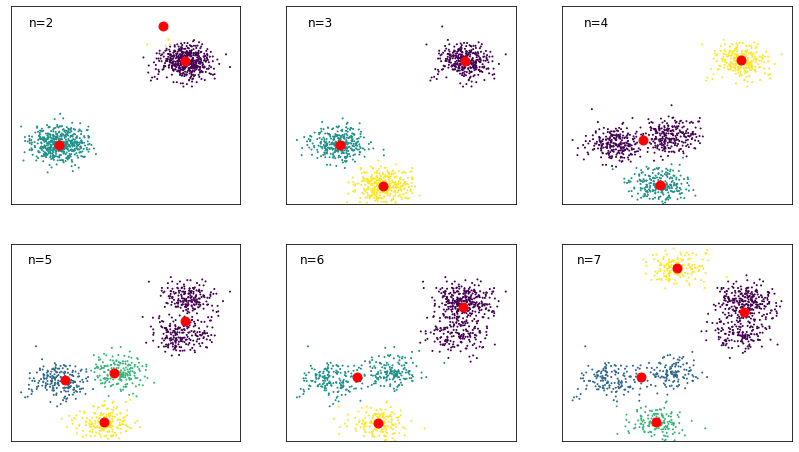

CPU times: total: 26.1 s
Wall time: 20.4 s


In [52]:
%%time
filas = 2
columnas = 3
fig, ax = plt.subplots(figsize=(14,8), nrows=filas, ncols=columnas)

for i in range (filas*columnas):
    print('Calculando N =',str(i+2))
    X, y = make_blobs(n_samples=1000, centers=i+2, cluster_std=0.9, random_state=1)
    bw = estimate_bandwidth(X, quantile=0.2)
    col = i % columnas
    row = i // columnas
    modelo = MeanShift(bandwidth=bw)
    y_means = modelo.fit_predict(X)
    centroides = modelo.cluster_centers_
    ax[row][col].scatter(X[:,0], X[:,1], s=1, c=y_means)
    ax[row][col].scatter(centroides[:,0], centroides[:,1], s=80, color='r')
    ax[row][col].axes.xaxis.set_visible(False)
    ax[row][col].axes.yaxis.set_visible(False)
    ax[row][col].set_ylim(-10,10)
    ax[row][col].text(s = 'n='+str(i+2), fontsize=12, y=8, x=-12)

plt.show()

In [53]:
# Vemos como resuelve con criterio quantil 10%

Calculando N = 2
Calculando N = 3
Calculando N = 4
Calculando N = 5
Calculando N = 6
Calculando N = 7


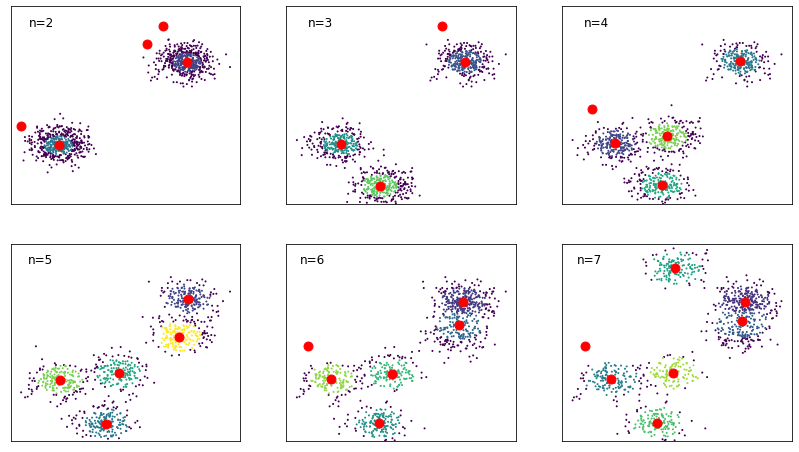

CPU times: total: 23.3 s
Wall time: 23.9 s


In [54]:
%%time
filas = 2
columnas = 3
fig, ax = plt.subplots(figsize=(14,8), nrows=filas, ncols=columnas)

for i in range (filas*columnas):
    print('Calculando N =',str(i+2))
    X, y = make_blobs(n_samples=1000, centers=i+2, cluster_std=0.9, random_state=1)
    bw = estimate_bandwidth(X, quantile=0.1)
    col = i % columnas
    row = i // columnas
    modelo = MeanShift(bandwidth = bw, cluster_all = False, min_bin_freq=5)
    y_means = modelo.fit_predict(X)
    centroides = modelo.cluster_centers_
    ax[row][col].scatter(X[:,0], X[:,1], s=1, c=y_means)
    ax[row][col].scatter(centroides[:,0], centroides[:,1], s=80, color='r')
    ax[row][col].axes.xaxis.set_visible(False)
    ax[row][col].axes.yaxis.set_visible(False)
    ax[row][col].set_ylim(-10,10)
    ax[row][col].text(s = 'n='+str(i+2), fontsize=12, y=8, x=-12)

plt.show()

## Funcionamiento de MeanShift para nubes "no radiales"

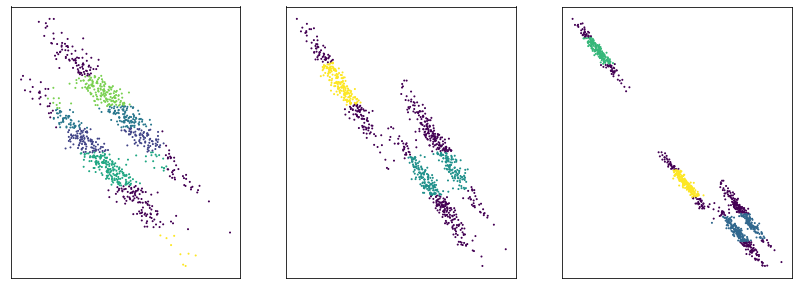

In [55]:
columnas = 3
fig, ax = plt.subplots(figsize=(14,5), ncols=columnas)

for i in range (columnas):

    X, y = make_blobs(random_state=170, n_samples=1000, centers = i+2)
    rng = np.random.RandomState(6)
    transformation = rng.normal(size=(2, 2))
    X_estrechos = np.dot(X, transformation)

    bw = estimate_bandwidth(X_estrechos, quantile=0.15)
    modelo = MeanShift(bandwidth=bw, cluster_all = False)
    y_means = modelo.fit_predict(X_estrechos)
    ax[i].scatter(X_estrechos[:,0], X_estrechos[:,1], s=1, c=y_means)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

plt.show()

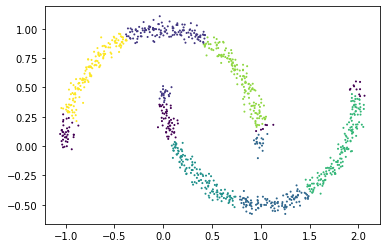

In [56]:
from sklearn.datasets import make_moons

Xmoon, ymoon = make_moons(1000, noise=0.04, random_state=0)
bw = estimate_bandwidth(Xmoon, quantile=0.15)
modelo = MeanShift(bandwidth=bw, cluster_all = False)
y_means = modelo.fit_predict(Xmoon)

fig, ax = plt.subplots(figsize=(6,4), nrows=1)
ax.scatter(Xmoon[:,0], Xmoon[:,1], s=1, c=y_means)

# 3D / nD  Clustering

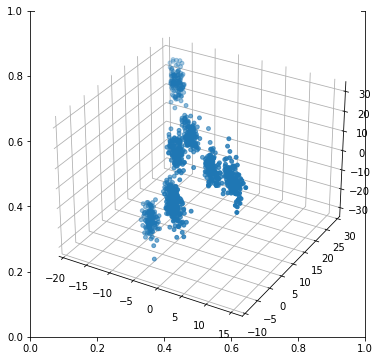

In [57]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from importlib import reload
reload(plt)


X, y = make_blobs(n_features=3, n_samples=1000, centers=8, cluster_std=1, random_state=1)
fig, ax = plt.subplots(figsize=(6,6))

rng = np.random.RandomState(2)
transformation = rng.normal(size=(3, 3))
X_estrechos = np.dot(X, transformation)


ax = plt.axes(projection='3d')

ax.scatter(X_estrechos[:,0], X_estrechos[:,1], X_estrechos[:,2], s=15)
ax.w_xaxis.set_pane_color((0,0,0,0))
ax.w_yaxis.set_pane_color((0,0,0,0))
ax.w_zaxis.set_pane_color((0,0,0,0))

plt.show()

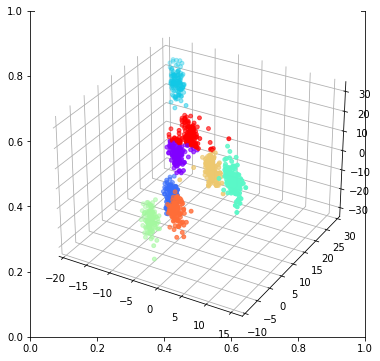

In [58]:
from sklearn.cluster import KMeans

n = 8
modelo = KMeans(n_clusters = n)
y_means = modelo.fit_predict(X_estrechos)
centroides = modelo.cluster_centers_


fig, ax = plt.subplots(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.scatter(X_estrechos[:,0], X_estrechos[:,1], X_estrechos[:,2], s=15, c=y_means, cmap='rainbow')
ax.w_xaxis.set_pane_color((0,0,0,0))
ax.w_yaxis.set_pane_color((0,0,0,0))
ax.w_zaxis.set_pane_color((0,0,0,0))


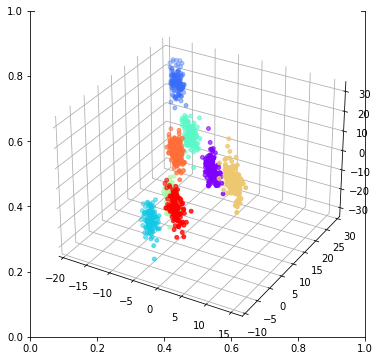

In [59]:
from sklearn.cluster import KMeans

n = 8
modelo = GaussianMixture(n_components=n, covariance_type='full', n_init=5)
y_means = modelo.fit_predict(X_estrechos)


fig, ax = plt.subplots(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.scatter(X_estrechos[:,0], X_estrechos[:,1], X_estrechos[:,2], s=15, c=y_means, cmap='rainbow')
ax.w_xaxis.set_pane_color((0,0,0,0))
ax.w_yaxis.set_pane_color((0,0,0,0))
ax.w_zaxis.set_pane_color((0,0,0,0))


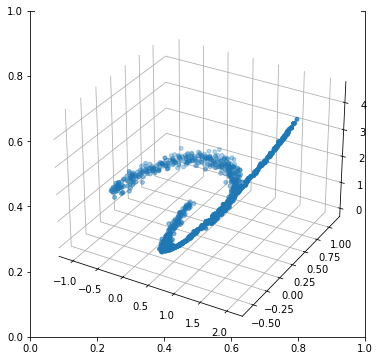

In [60]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(1000, noise=0.04, random_state=0)
Z = Xmoon[:,0]**2 + Xmoon[:,1]**2
Xmoon = np.array(list(zip(Xmoon[:,0],Xmoon[:,1],Z)))

fig, ax = plt.subplots(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.scatter(Xmoon[:, 0], Xmoon[:, 1], Xmoon[:, 2], s=15)
ax.w_xaxis.set_pane_color((0,0,0,0))
ax.w_yaxis.set_pane_color((0,0,0,0))
ax.w_zaxis.set_pane_color((0,0,0,0))


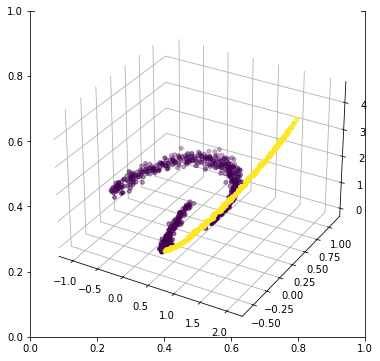

In [61]:
n = 2
modelo = GaussianMixture(n_components=n, covariance_type='full')
y_means = modelo.fit_predict(Xmoon)

fig, ax = plt.subplots(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.scatter(Xmoon[:, 0], Xmoon[:, 1], Xmoon[:, 2], s=15,  c=y_means)
ax.w_xaxis.set_pane_color((0,0,0,0))
ax.w_yaxis.set_pane_color((0,0,0,0))
ax.w_zaxis.set_pane_color((0,0,0,0))

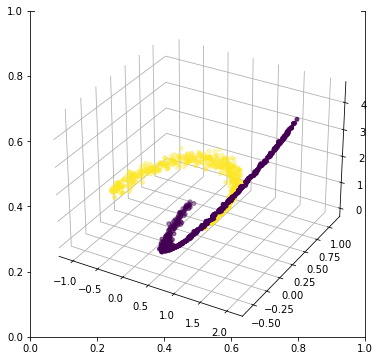

In [62]:
tolerancia = 0.2
modelo = DBSCAN(eps = tolerancia, min_samples=2)
y_means = modelo.fit_predict(Xmoon)

fig, ax = plt.subplots(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.scatter(Xmoon[:, 0], Xmoon[:, 1], Xmoon[:, 2], s=15,  c=y_means)
ax.w_xaxis.set_pane_color((0,0,0,0))
ax.w_yaxis.set_pane_color((0,0,0,0))
ax.w_zaxis.set_pane_color((0,0,0,0))

# Visualizacion 3D en clustering para idea de trading

[*********************100%***********************]  1 of 1 completed


Text(0.5, 0, 'Delta Precio Fw')

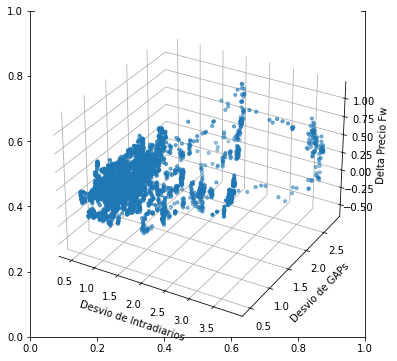

In [63]:
import yfinance as yf
df = yf.download('AAPL', start='2005-01-01', auto_adjust='true')
df['intra'] = (df.High/df.Low-1)*100
df['gap'] = (df.Open/df.Close.shift()-1)*100

df['intra_desvio'] = df['intra'].rolling(100).std()
df['gap_desvio'] = df['gap'].rolling(100).std()

df['fw'] = (df.Close.shift(-100)/df.Close-1)
df = df.dropna()

fig, ax = plt.subplots(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.scatter(df['intra_desvio'],df['gap_desvio'],df['fw'], s=10)
ax.w_xaxis.set_pane_color((0,0,0,0))
ax.w_yaxis.set_pane_color((0,0,0,0))
ax.w_zaxis.set_pane_color((0,0,0,0))

ax.set_xlabel('Desvio de Intradiarios')
ax.set_ylabel('Desvio de GAPs')
ax.set_zlabel('Delta Precio Fw')

Text(0.5, 0, 'Delta Precio Fw')

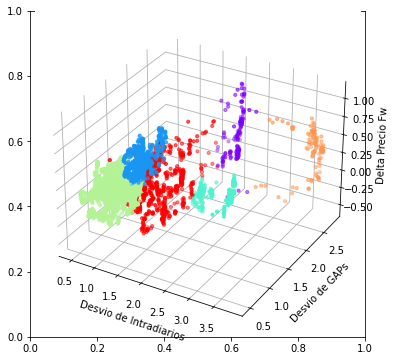

In [64]:
X = np.array(list(zip(df['intra_desvio'],df['gap_desvio'],df['fw'])))

n = 6
modelo = GaussianMixture(n_components=n, covariance_type='full')
y_means = modelo.fit_predict(X)

fig, ax = plt.subplots(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=10,  c=y_means, cmap='rainbow')
ax.w_xaxis.set_pane_color((0,0,0,0))
ax.w_yaxis.set_pane_color((0,0,0,0))
ax.w_zaxis.set_pane_color((0,0,0,0))

ax.set_xlabel('Desvio de Intradiarios')
ax.set_ylabel('Desvio de GAPs')
ax.set_zlabel('Delta Precio Fw')

In [65]:
df

,Open,High,Low,Close,Volume,intra,gap,intra_desvio,gap_desvio,fw
Date,,,,,,,,,,
2005-05-25,1.199026,1.212686,1.193563,1.207526,396006800,1.602232,-0.503768,1.649154,1.701976,0.343389
2005-05-26,1.212383,1.242738,1.212383,1.236667,525520800,2.503729,0.402266,1.650448,1.701853,0.281542
2005-05-27,1.233631,1.238185,1.214508,1.231202,316008000,1.949507,-0.245449,1.655629,1.702510,0.354537
2005-05-31,1.234238,1.236667,1.201454,1.206919,404205200,2.930807,0.246603,1.649345,1.701976,0.411972
2005-06-01,1.210865,1.237273,1.209954,1.223310,453812800,2.257913,0.326955,1.650799,1.701948,0.381141
...,...,...,...,...,...,...,...,...,...,...
2023-03-08,152.598929,153.258021,151.620287,152.658844,47204800,1.080155,0.798147,1.256954,1.226954,0.281354
2023-03-09,153.347887,154.326529,150.022485,150.381989,53833600,2.868933,0.451362,1.187454,1.203804,0.280606
2023-03-10,150.002521,150.731508,147.406106,148.294876,68572400,2.255946,-0.252336,1.173714,1.200422,0.289121


In [66]:
res = df.copy()
res['etiquetas'] = np.array(y_means)
medias = res.groupby('etiquetas').mean().loc[:,['intra','gap','intra_desvio','gap_desvio','fw']]
medias.sort_values('fw', ascending=False)

,intra,gap,intra_desvio,gap_desvio,fw
etiquetas,,,,,
0,3.797034,0.112867,2.280312,2.375773,0.438028
1,2.548967,0.189003,1.249619,1.187831,0.435961
4,5.574892,-0.056683,3.648438,2.614328,0.368009
3,1.899524,0.071044,0.884103,0.938560,0.093671
5,2.817142,0.161363,1.378108,1.450631,0.039935
2,3.006961,0.245056,2.397698,1.592676,-0.006063


In [67]:
res.groupby('etiquetas').size()

etiquetas
0     159
1     573
2     276
3    2493
4     103
5     877
dtype: int64